In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import (confusion_matrix, classification_report, roc_auc_score,roc_curve,silhouette_samples,silhouette_score,accuracy_score, mean_squared_error, r2_score,mean_absolute_error)
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from scipy.stats import chi2_contingency
import warnings; warnings.filterwarnings("ignore")

## Descriptive Analysis

In [2]:
# Loading the data
data = pd.read_csv('psyco.csv')

In [3]:
# Create a copy of the original dataset
data_copy = data.copy()

In [4]:
# Inspect the first 5 rows
data.head()

,age,gender,occupation,line_of_work,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw,prefer,certaindays_hw
0,19-25,Male,Student in College,NaN,7,5,0.5,3,3,0.0,0.0,0.5,1.0,-0.5,-0.5,100,1,Complete Physical Attendance,Yes
1,Dec-18,Male,Student in School,NaN,7,11,0.5,4,2,-0.5,0.5,-1.0,1.0,1.0,1.0,1111,1110,Complete Physical Attendance,No
2,19-25,Male,Student in College,NaN,7,7,1.5,2,2,1.0,0.0,0.5,0.5,0.5,0.5,1100,111,Complete Physical Attendance,Yes
3,19-25,Male,Student in College,NaN,7,7,1.5,3,1,0.0,1.0,0.5,0.0,-1.0,-0.5,100,1111,Complete Physical Attendance,Yes
4,19-25,Female,Student in College,NaN,7,7,1.5,2,2,0.0,0.0,0.0,0.0,0.5,0.0,1010,1000,Complete Physical Attendance,Yes


In [5]:
# Understand total rows and column in the dataset
data.shape

(1175, 19)

In [6]:
#Understand the different data types of each columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1175 non-null   object 
 1   gender          1175 non-null   object 
 2   occupation      1175 non-null   object 
 3   line_of_work    479 non-null    object 
 4   time_bp         1175 non-null   int64  
 5   time_dp         1175 non-null   int64  
 6   travel_time     1175 non-null   float64
 7   easeof_online   1175 non-null   int64  
 8   home_env        1175 non-null   int64  
 9   prod_inc        1175 non-null   float64
 10  sleep_bal       1175 non-null   float64
 11  new_skill       1175 non-null   float64
 12  fam_connect     1175 non-null   float64
 13  relaxed         1175 non-null   float64
 14  self_time       1175 non-null   float64
 15  like_hw         1175 non-null   int64  
 16  dislike_hw      1175 non-null   int64  
 17  prefer          1175 non-null   o

The dataset has 1175 entries with 19 columns, combining demographic and psychological data during COVID-19.

In [7]:
# Identify categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = data.select_dtypes(include=['number']).columns.tolist()

# Create a DataFrame with both lists, filling shorter one with empty strings
columns_df = pd.DataFrame({
    'Categorical Columns': categorical_columns + [''] * (len(numerical_columns) - len(categorical_columns)),
    'Numerical Columns': numerical_columns + [''] * (len(categorical_columns) - len(numerical_columns))
})

# Display the table
columns_df

,Categorical Columns,Numerical Columns
0,age,time_bp
1,gender,time_dp
2,occupation,travel_time
3,line_of_work,easeof_online
4,prefer,home_env
5,certaindays_hw,prod_inc
6,,sleep_bal
7,,new_skill
8,,fam_connect
9,,relaxed


* There are 6 Categorical columns and 13 Numerical columns

In [8]:
# Create an empty list to store the DataFrames
df_list = []
for col in categorical_columns:
    # Compute the value counts, convert to a DataFrame, and add the column name as an index
    counts = data[col].value_counts().rename('count').to_frame()
    counts.index.name = col
    df_list.append(counts)

# Concatenate all the DataFrames vertically
distribution_df = pd.concat(df_list, keys=categorical_columns)

# Replace NaN values with 0 for better readability
distribution_df = distribution_df.fillna(0)

# Display the result
distribution_df


count
age            19-25                                                 345
               26-32                                                 261
               40-50                                                 181
               50-60                                                 170
               33-40                                                 102
               Dec-18                                                 74
               60+                                                    42
gender         Male                                                  649
               Female                                                518
               Prefer not to say                                       8
occupation     Working Professional                                  479
               Student in College                                    358
               Entrepreneur                                          119
               Homemaker                                              82
               Medical Professional aiding efforts against COV...     73
               Currently Out of Work                                  44
               Student in School                                      18
               Retired/Senior Citizen                                  2
line_of_work   Teaching                                              217
               Engineering                                           116
               Management                                             66
               Other                                                  40
               Government Employee                                    35
               Architect                                               3
               APSPDCL                                                 1
               Architecture                                            1
prefer         Complete Physical Attendance                          836
               Work/study from home                                  339
certaindays_hw Yes                                                   568
               No                                                    309
               Maybe                                                 298

In [9]:
# Get summary of the numerical columns
data.describe()

,time_bp,time_dp,travel_time,easeof_online,home_env,prod_inc,sleep_bal,new_skill,fam_connect,relaxed,self_time,like_hw,dislike_hw
count,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000,1175.000000
mean,7.415319,7.971915,1.027660,2.533617,2.752340,0.008936,-0.108936,0.146809,0.260426,0.035745,0.082979,734.840851,651.067234
std,2.005385,2.657007,0.713314,1.267609,1.235799,0.615083,0.621215,0.643686,0.686825,0.626637,0.541434,468.000935,502.319310
min,4.000000,4.000000,0.500000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,5.000000,5.000000,0.500000,1.000000,2.000000,-0.500000,-0.500000,-0.500000,0.000000,-0.500000,-0.500000,100.000000,101.000000
50%,7.000000,9.000000,0.500000,2.000000,3.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000,1001.000000,1000.000000
75%,9.000000,9.000000,1.500000,4.000000,4.000000,0.500000,0.500000,0.500000,1.000000,0.500000,0.500000,1100.000000,1101.000000
max,12.000000,12.000000,3.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1111.000000,1111.000000


In [10]:
#identify the missing values
data.isnull().sum()

age                 0
gender              0
occupation          0
line_of_work      696
time_bp             0
time_dp             0
travel_time         0
easeof_online       0
home_env            0
prod_inc            0
sleep_bal           0
new_skill           0
fam_connect         0
relaxed             0
self_time           0
like_hw             0
dislike_hw          0
prefer              0
certaindays_hw      0
dtype: int64

Only the 'line_of_work' column has missing values of 696 in the dataset.

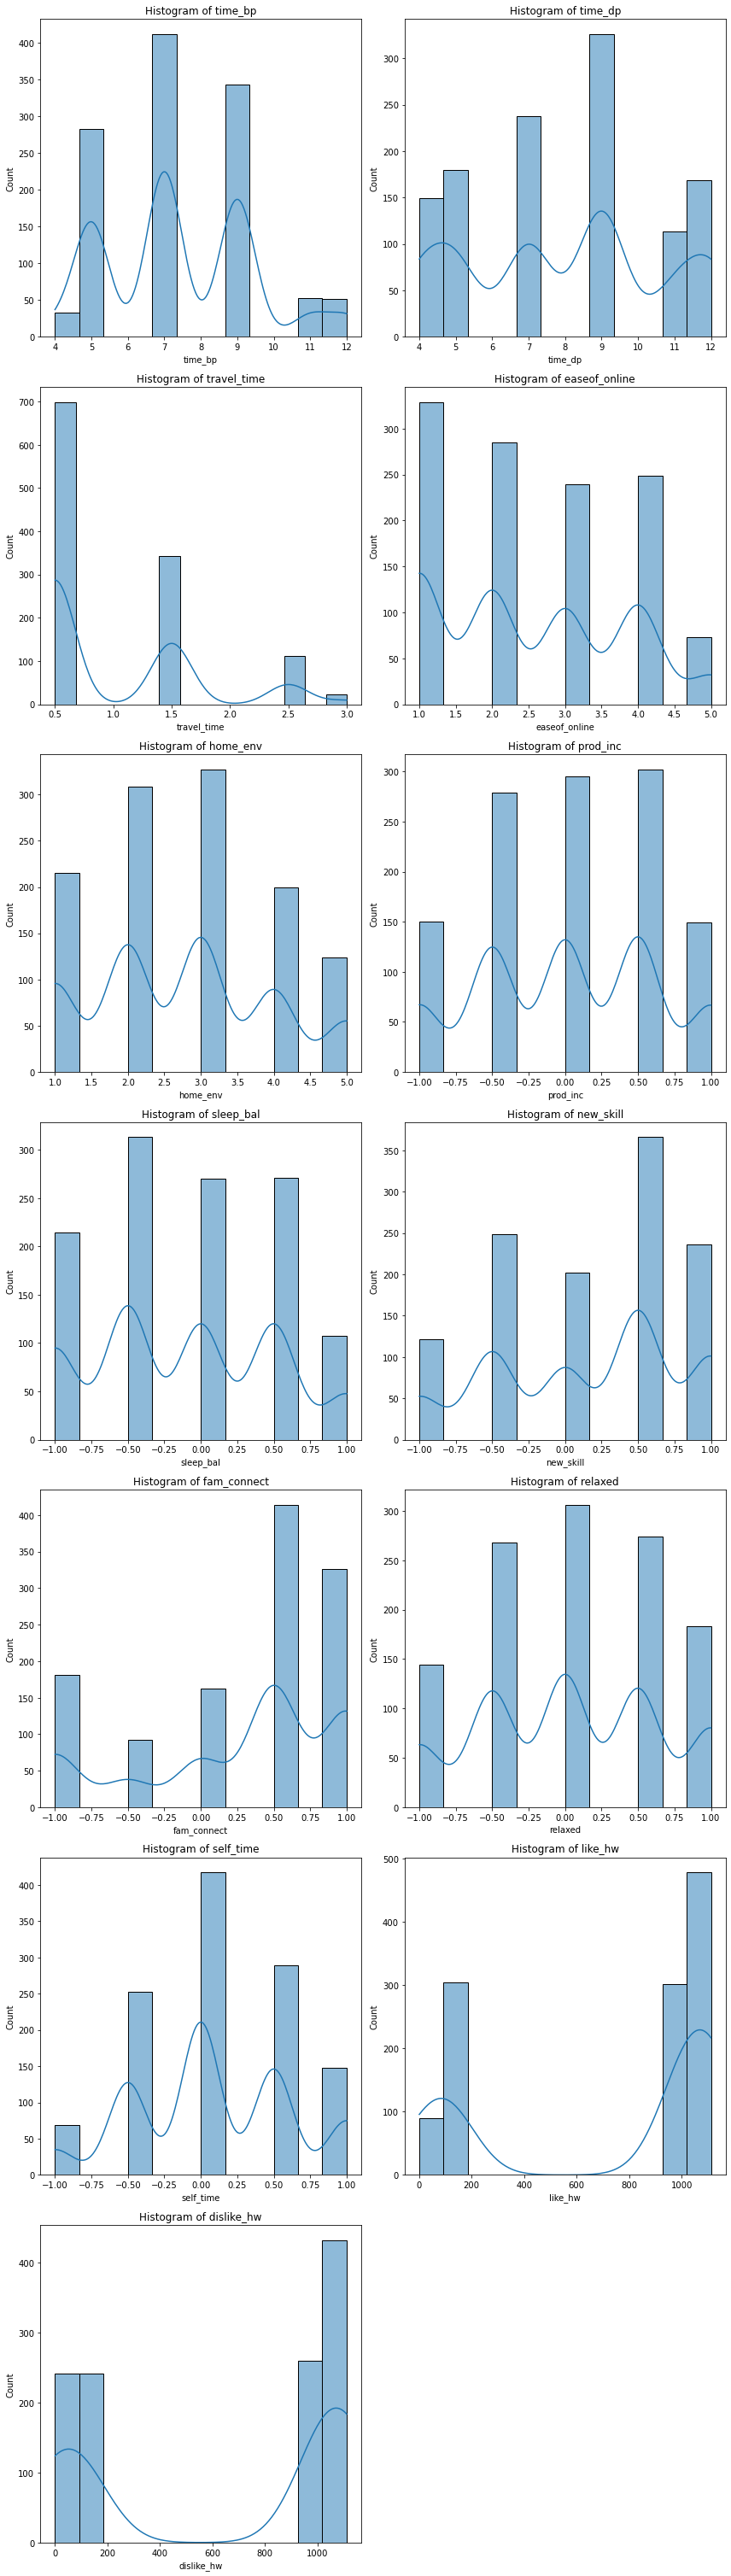

In [11]:
#Visual Check Using Histograms to identify if the numerical columns are normally distributed
num_cols = len(numerical_columns)
nrows = (num_cols + 1) // 2  # To determine the number of rows needed for subplots

plt.figure(figsize=(12, 6 * nrows))

for idx, col in enumerate(numerical_columns, 1):
    plt.subplot(nrows, 2, idx)
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.tight_layout()  # Ensures that subplots do not overlap

plt.show()

In [12]:
# Identify outliers in all numerical columns and store in a DataFrame
outliers_table = pd.DataFrame()

for col in numerical_columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]
    
    # Create a DataFrame for the outliers with the column name
    outliers_df = pd.DataFrame({'Outlier': outliers, 'Column': col})
    
    # Append the outliers DataFrame to the main table
    outliers_table = outliers_table.append(outliers_df, ignore_index=True)

# Display the table
outliers_table

,Outlier,Column


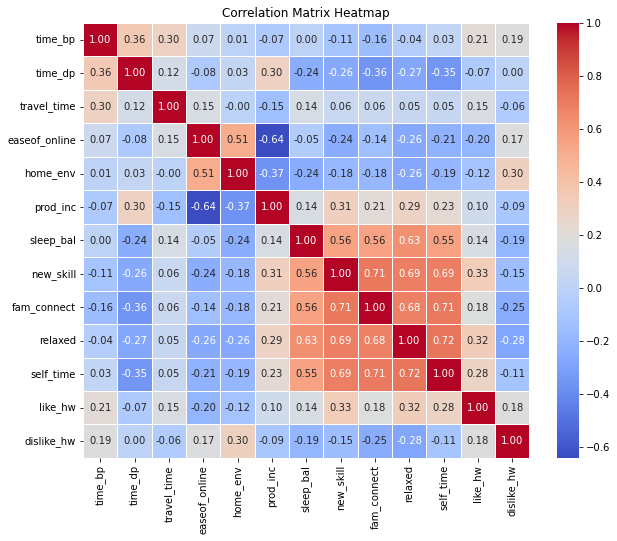

In [13]:
# Calculate the correlation matrix of numerical columns
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [14]:
def categorize_correlation(value):
    if abs(value) > 0.6:
        return 'High'
    elif 0.4 <= abs(value) <= 0.6:
        return 'Moderate'
    else:
        return 'Low'

In [15]:
correlation_matrix = data.corr()
categorized_corr_matrix = correlation_matrix.applymap(categorize_correlation)

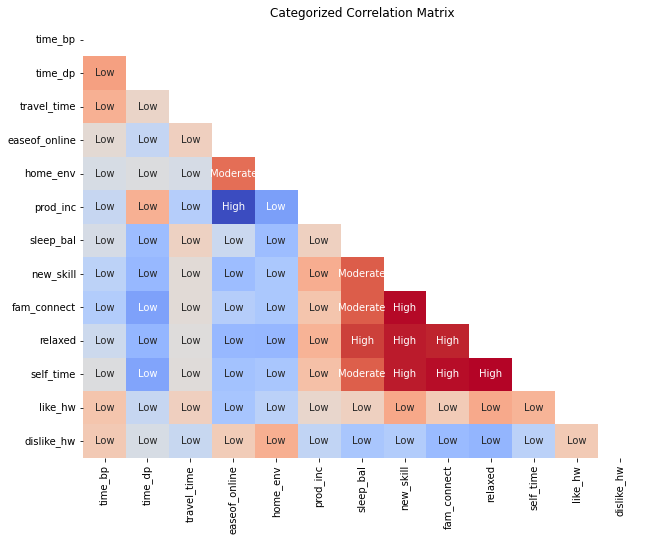

In [16]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=categorized_corr_matrix, fmt='', mask=mask, cmap='coolwarm', cbar=False)
plt.title("Categorized Correlation Matrix")
plt.show()

## Data Imputation

In [17]:
occ_low = data[['occupation', 'line_of_work']].drop_duplicates()
occ_low

,occupation,line_of_work
0,Student in College,NaN
1,Student in School,NaN
14,Working Professional,Teaching
22,Working Professional,Engineering
45,Entrepreneur,NaN
72,Retired/Senior Citizen,NaN
78,Working Professional,Management
114,Homemaker,NaN
169,Working Professional,APSPDCL
173,Currently Out of Work,NaN


In [18]:
occupation_to_line_of_work = {
    'Student in College': 'Education',
    'Student in School': 'Education',
    'Entrepreneur': 'Business',
    'Retired/Senior Citizen': 'Retired',
    'Homemaker': 'Household Management',
    'Currently Out of Work': 'Unemployed',
    'Medical Professional aiding efforts against COVID-19': 'Healthcare',
}


In [19]:
data['line_of_work'] = data.apply(lambda row: occupation_to_line_of_work[row['occupation']] if pd.isna(row['line_of_work']) else row['line_of_work'],
    axis=1)

In [20]:
data['line_of_work'].unique()

array(['Education', 'Teaching', 'Engineering', 'Business', 'Retired',
       'Management', 'Household Management', 'APSPDCL ', 'Unemployed',
       'Architecture', 'Architect', 'Other', 'Healthcare',
       'Government Employee'], dtype=object)

In [21]:
data['age'].unique()

array(['19-25', 'Dec-18', '33-40', '60+', '26-32', '40-50', '50-60'],
      dtype=object)

In [22]:
age_data = data.groupby('age')['occupation'].unique()
age_data

age
19-25     [Student in College, Working Professional, Ent...
26-32     [Working Professional, Student in College, Ent...
33-40     [Working Professional, Homemaker, Currently Ou...
40-50     [Homemaker, Working Professional, Medical Prof...
50-60     [Retired/Senior Citizen, Working Professional,...
60+       [Entrepreneur, Homemaker, Currently Out of Wor...
Dec-18              [Student in School, Student in College]
Name: occupation, dtype: object

The age category labeled as 'Dec-18' appears to be a typographical error and is most likely intended to represent the age range of 13-18. This conclusion is supported by two key points: first, the age range of 13-18 is missing from the dataset, and second, the occupation associated with 'Dec-18' is 'Student in School,' which typically corresponds to that age group. Therefore, it's reasonable to infer that 'Dec-18' should be corrected to '13-18'

In [23]:
data['age'] = data['age'].replace('Dec-18', '13-18')

In [24]:
# Define a mapping for age groups with more meaningful names
age_group_mapping = {
    '13-18': 'Teen',
    '19-25': 'Young Adult',
    '26-32': 'Adult',
    '33-40': 'Mature Adult',
    '40-50': 'Middle Age',
    '50-60': 'Senior Adult',
    '60+': 'Elder'
}

# Map the age groups to meaningful category names
data['age_group_category'] = data['age'].map(age_group_mapping)

In [25]:
data = data[data['gender'] != 'Prefer not to say']

Removed unwanted categories (Prefer not to say)

## Data Visualisation

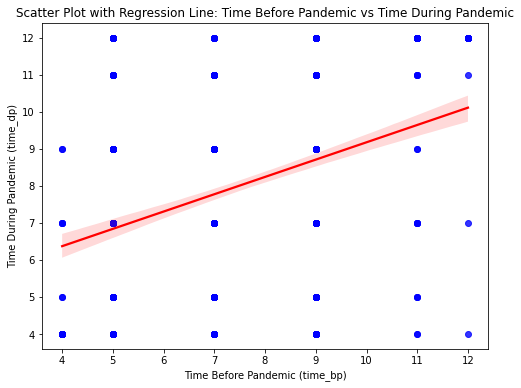

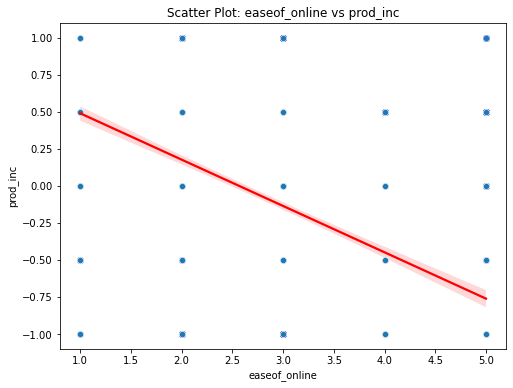

In [26]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='time_bp', y='time_dp', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line: Time Before Pandemic vs Time During Pandemic')
plt.xlabel('Time Before Pandemic (time_bp)')
plt.ylabel('Time During Pandemic (time_dp)')
plt.show()

plt.figure(figsize=(8, 6))
sns.regplot(x='easeof_online', y='prod_inc', data=data, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
sns.scatterplot(x='easeof_online', y='prod_inc', data=data)
plt.title('Scatter Plot: easeof_online vs prod_inc')
plt.show()

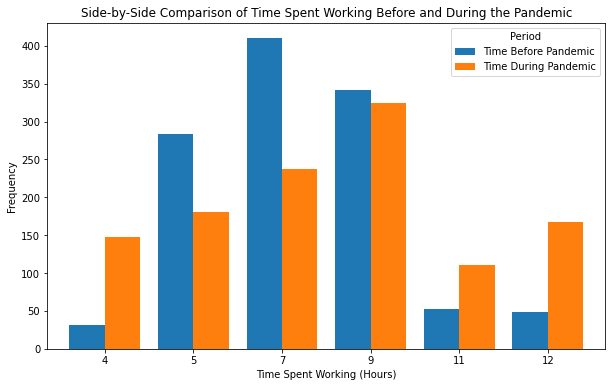

In [27]:
# Calculate the frequency of each time category for time before and during the pandemic
time_bp_counts = data['time_bp'].value_counts().sort_index()
time_dp_counts = data['time_dp'].value_counts().sort_index()

# Combine the two into a DataFrame for easier plotting
time_comparison_df = pd.DataFrame({
    'Time Before Pandemic': time_bp_counts,
    'Time During Pandemic': time_dp_counts
})

# Plot the side-by-side bar graph
time_comparison_df.plot(kind='bar', figsize=(10, 6), width=0.8)

plt.title('Side-by-Side Comparison of Time Spent Working Before and During the Pandemic')
plt.xlabel('Time Spent Working (Hours)')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Period')
plt.show()


In [28]:
occupation_work_hours = data[['occupation','time_bp','time_dp']]
occupation_mean_work_hours = occupation_work_hours.groupby('occupation').mean()
occupation_mean_work_hours

,time_bp,time_dp
occupation,,
Currently Out of Work,8.545455,4.886364
Entrepreneur,6.555556,8.829060
Homemaker,4.864198,10.135802
Medical Professional aiding efforts against COVID-19,8.945205,9.739726
Retired/Senior Citizen,12.000000,12.000000
Student in College,6.885154,6.456583
Student in School,7.125000,6.250000
Working Professional,8.092050,8.566946


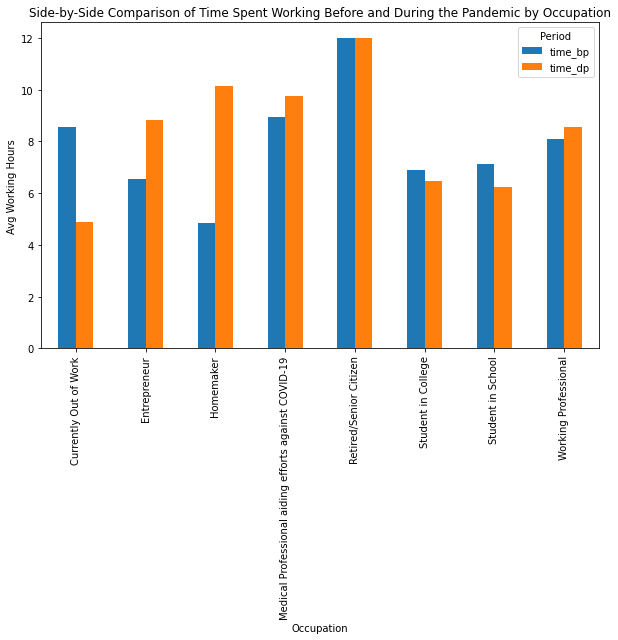

In [29]:
# Plot the side-by-side bar graph
occupation_mean_work_hours.plot(kind='bar', figsize=(10, 6))

plt.title('Side-by-Side Comparison of Time Spent Working Before and During the Pandemic by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Avg Working Hours')
plt.xticks(rotation=90)
plt.legend(title='Period')
plt.show()

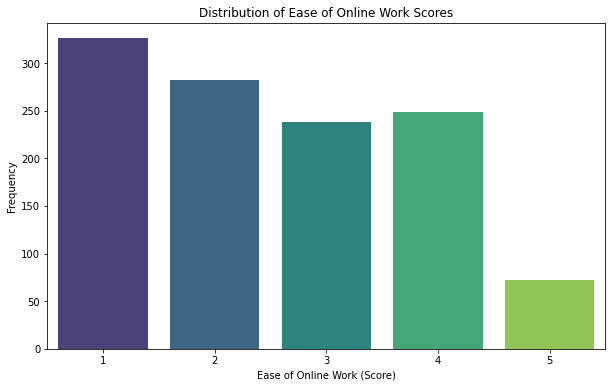

In [30]:
# Plot a bar chart for easeof_online scores
plt.figure(figsize=(10, 6))
sns.countplot(x='easeof_online', data=data, palette='viridis')

plt.title('Distribution of Ease of Online Work Scores')
plt.xlabel('Ease of Online Work (Score)')
plt.ylabel('Frequency')
plt.show()


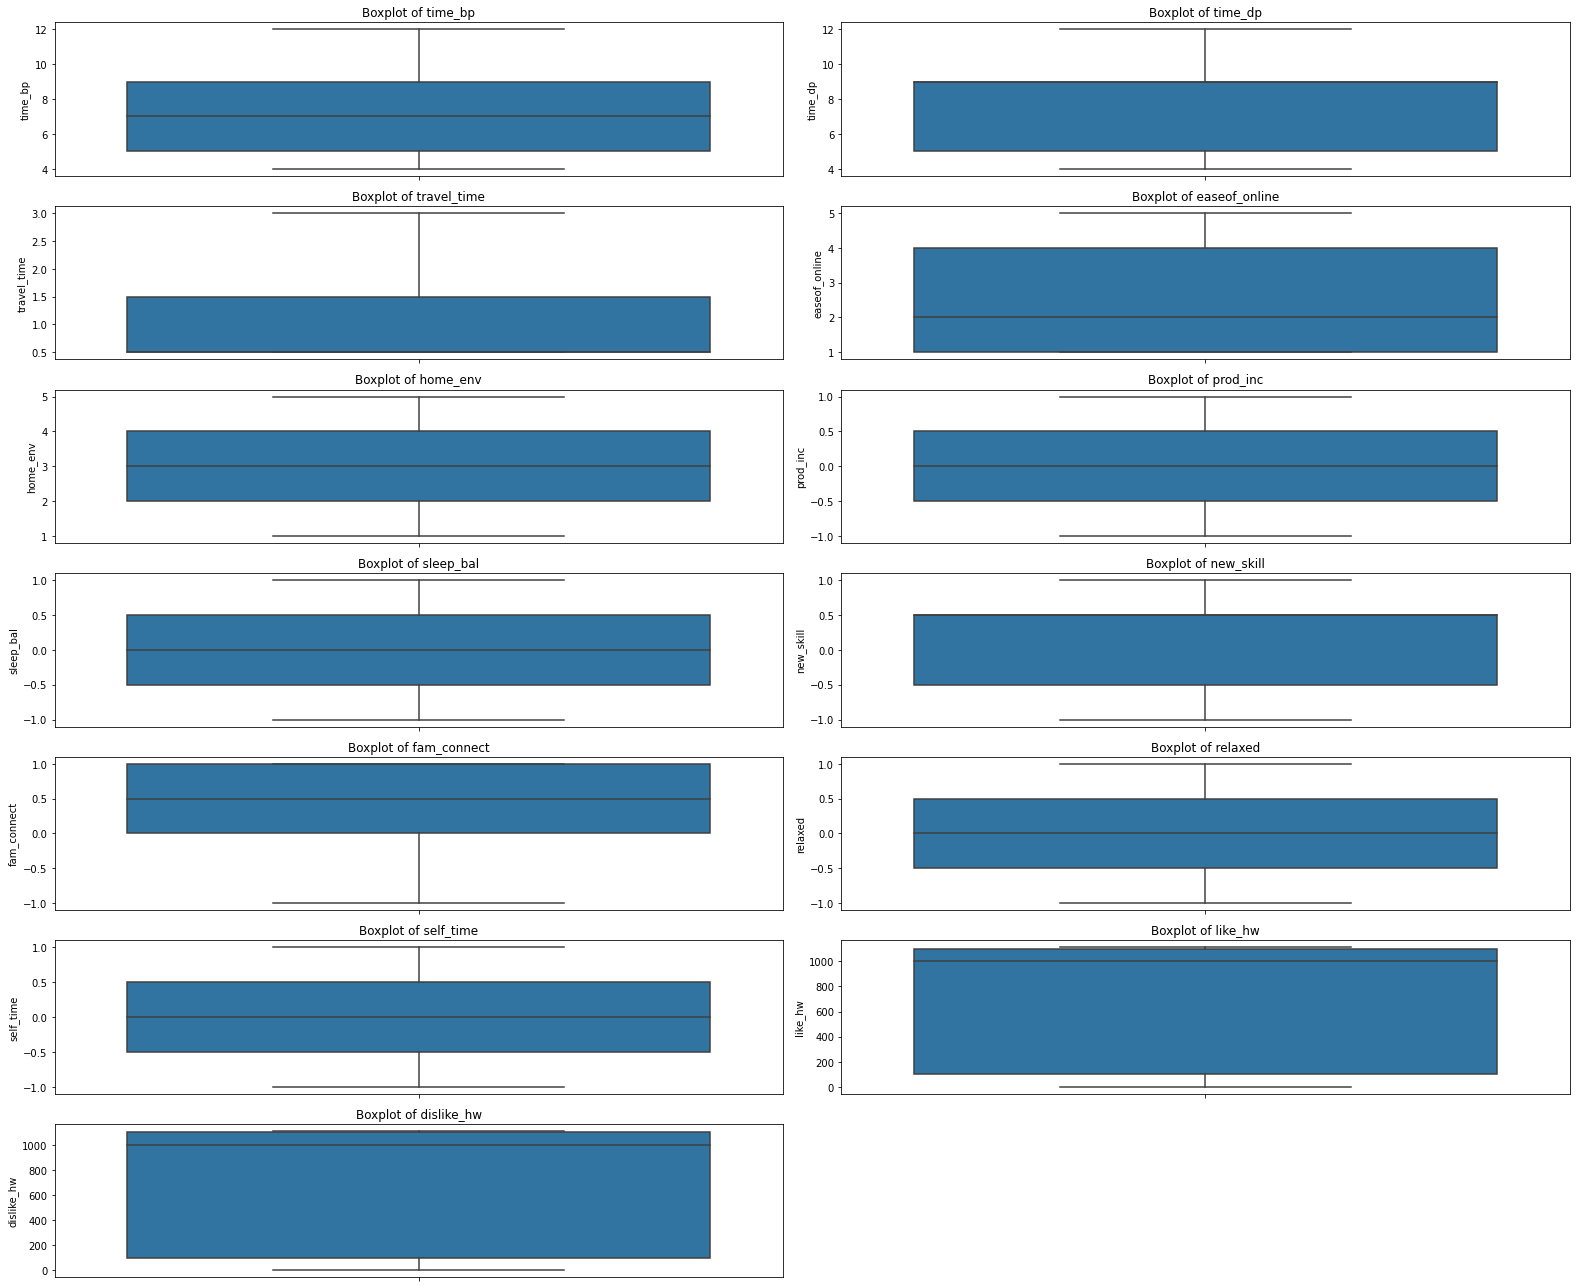

,count,mean,std,min,25%,50%,75%,max
time_bp,1167.0,7.405313,1.996843,4.0,5.0,7.0,9.0,12.0
time_dp,1167.0,7.962296,2.654867,4.0,5.0,9.0,9.0,12.0
travel_time,1167.0,1.022708,0.707803,0.5,0.5,0.5,1.5,3.0
easeof_online,1167.0,2.536418,1.267147,1.0,1.0,2.0,4.0,5.0
home_env,1167.0,2.753213,1.235178,1.0,2.0,3.0,4.0,5.0
prod_inc,1167.0,0.008997,0.614055,-1.0,-0.5,0.0,0.5,1.0
sleep_bal,1167.0,-0.105398,0.620225,-1.0,-0.5,0.0,0.5,1.0
new_skill,1167.0,0.147386,0.642378,-1.0,-0.5,0.5,0.5,1.0
fam_connect,1167.0,0.261782,0.686350,-1.0,0.0,0.5,1.0,1.0
relaxed,1167.0,0.037704,0.624569,-1.0,-0.5,0.0,0.5,1.0


In [31]:
# Create a figure with subplots for each boxplot
plt.figure(figsize=(22, 18))  
# Plot each boxplot in a single figure
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//2 + 1, 2, i)  # Adjust grid based on the number of plots
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

# Show the combined plot
plt.show()

# Display statistical summary for each numerical column
stats_summary = data[numerical_columns].describe().T
stats_summary


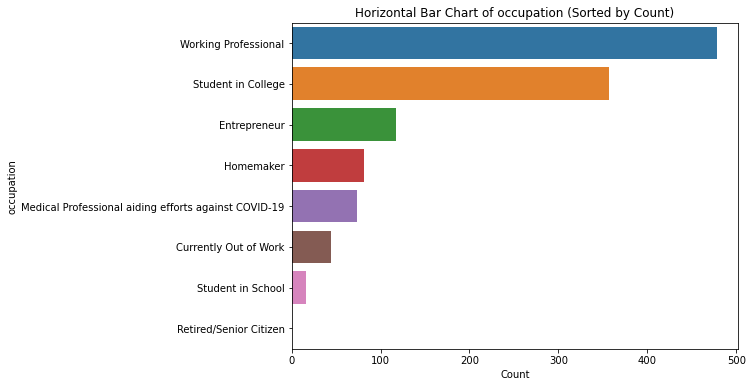

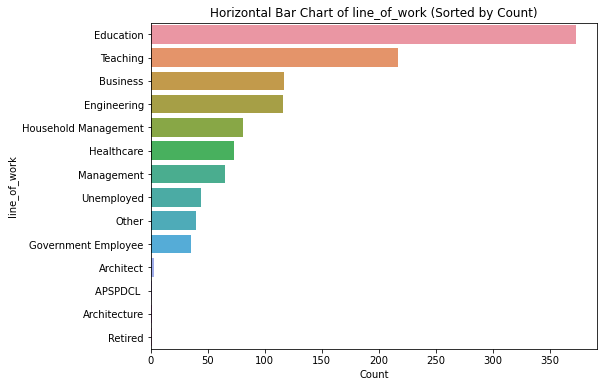

In [32]:
# List of categorical columns
categorical_columns = ['occupation', 'line_of_work']

# Plot sorted horizontal bar charts
for col in categorical_columns:
    plt.figure(figsize=(8, 6))
    
    # Sort the categories by count
    sorted_order = data[col].value_counts().index
    
    # Plot the countplot with sorted order as a horizontal bar chart
    sns.countplot(y=col, data=data, order=sorted_order)
    plt.title(f'Horizontal Bar Chart of {col} (Sorted by Count)')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


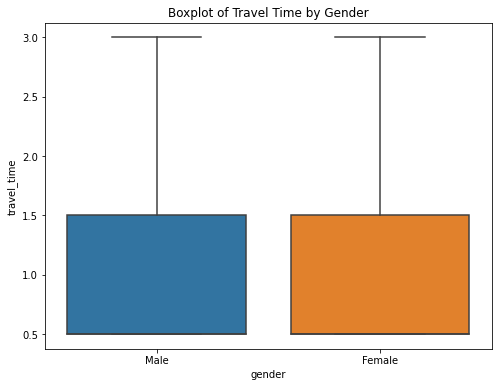

In [33]:
# Boxplot to visualize outliers in 'travel_time' grouped by 'gender'
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='travel_time', data=data)
plt.title('Boxplot of Travel Time by Gender')
plt.show()

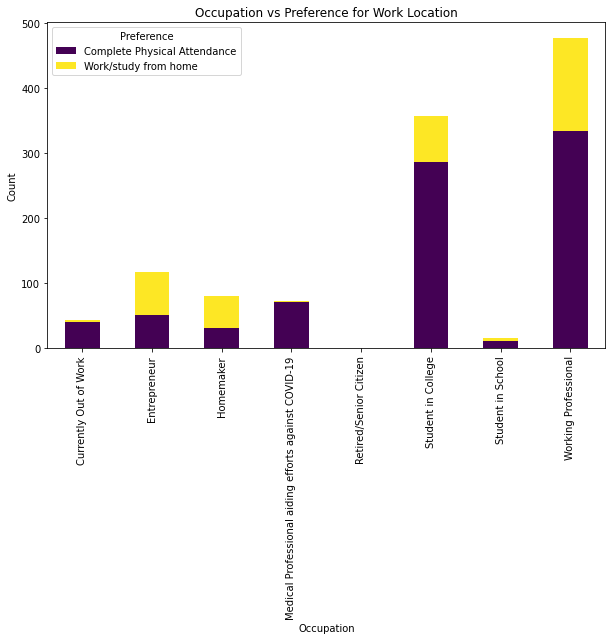

Summary Statistics for Occupation vs Preference (with Percentages):



prefer,Complete Physical Attendance,Work/study from home,All,Complete Physical Attendance %,Work/study from home %
occupation,,,,,
Currently Out of Work,40,4,44,90.909091,9.090909
Entrepreneur,52,65,117,44.444444,55.555556
Homemaker,32,49,81,39.506173,60.493827
Medical Professional aiding efforts against COVID-19,72,1,73,98.630137,1.369863
Retired/Senior Citizen,1,0,1,100.000000,0.000000
Student in College,287,70,357,80.392157,19.607843
Student in School,12,4,16,75.000000,25.000000
Working Professional,335,143,478,70.083682,29.916318
All,831,336,1167,71.208226,28.791774


In [34]:
# Create a cross-tabulation of occupation and prefer
occupation_prefer_ct = pd.crosstab(data['occupation'], data['prefer'])

# Plot stacked bar chart
occupation_prefer_ct.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Occupation vs Preference for Work Location')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Preference')
plt.show()

# Generate and display summary statistics with percentages
occupation_prefer_stats = pd.crosstab(data['occupation'], data['prefer'], margins=True)

# Calculate percentages
occupation_prefer_stats['Complete Physical Attendance %'] = (occupation_prefer_stats['Complete Physical Attendance'] / occupation_prefer_stats['All']) * 100
occupation_prefer_stats['Work/study from home %'] = (occupation_prefer_stats['Work/study from home'] / occupation_prefer_stats['All']) * 100

# Display the updated summary statistics
print("Summary Statistics for Occupation vs Preference (with Percentages):\n")
occupation_prefer_stats

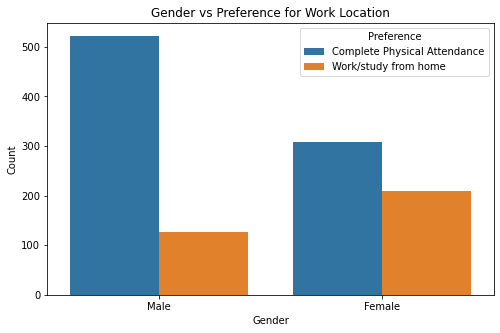

Summary Statistics for Gender vs Preference (with Percentages):



prefer,Complete Physical Attendance,Work/study from home,All,Complete Physical Attendance %,Work/study from home %
gender,,,,,
Female,309,209,518,59.652510,40.347490
Male,522,127,649,80.431433,19.568567
All,831,336,1167,71.208226,28.791774


In [35]:
# Count plot: gender vs. prefer
plt.figure(figsize=(8, 5))
sns.countplot(x='gender', hue='prefer', data=data)
plt.title('Gender vs Preference for Work Location')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Preference')
plt.show()

# Generate summary statistics with percentages
gender_prefer_stats = pd.crosstab(data['gender'], data['prefer'], margins=True)

# Calculate percentages
gender_prefer_stats['Complete Physical Attendance %'] = (gender_prefer_stats['Complete Physical Attendance'] / gender_prefer_stats['All']) * 100
gender_prefer_stats['Work/study from home %'] = (gender_prefer_stats['Work/study from home'] / gender_prefer_stats['All']) * 100

# Display the updated summary statistics
print("Summary Statistics for Gender vs Preference (with Percentages):\n")
gender_prefer_stats

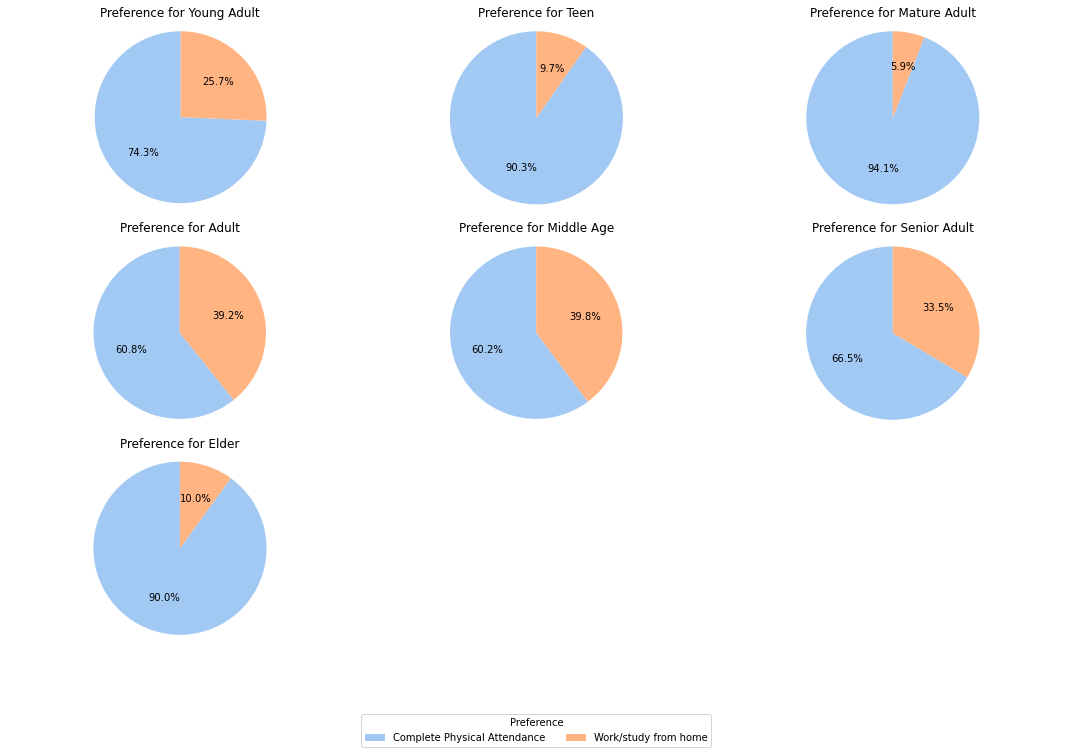

In [36]:
# Get the unique age group categories
age_groups = data['age_group_category'].unique()

# Set the number of rows and columns for subplots (adjust based on the number of categories)
n_cols = 3  # Number of columns in the grid
n_rows = (len(age_groups) + n_cols - 1) // n_cols  # Number of rows

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # Flatten in case we have a grid to access each axis easily

# Generate different colors for each pie chart
colors = sns.color_palette("pastel", len(data['prefer'].unique()))

# Loop through each age group and create a pie chart
for i, age_group in enumerate(age_groups):
    # Filter the data for the current age group
    group_data = data[data['age_group_category'] == age_group]['prefer'].value_counts()
    
    # Plot pie chart on the corresponding subplot axis
    wedges, texts, autotexts = axes[i].pie(group_data, autopct='%1.1f%%', startangle=90, colors=colors)
    
    # Set title for each pie chart
    axes[i].set_title(f'Preference for {age_group}')
    axes[i].axis('equal')  # Equal aspect ratio for the pie chart

# Hide any empty subplots if the number of categories is not a perfect grid
for j in range(i+1, n_rows * n_cols):
    axes[j].axis('off')

# Create a single legend for all the pie charts, and place it below the charts
fig.legend(wedges, group_data.index, title="Preference", loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)

# Adjust layout for better spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  
plt.show()


## Statistical Test 

#### Data Understanding

The table provides a summary of the relationship between gender and work/study location preference. The preferences are categorized into:

* Complete Physical Attendance
* Work/study from home

The goal is to determine if there is a statistically significant association between gender and work/study location preference.

#### Choosing the Appropriate Statistical Test

Given that you have categorical data (gender and preference), and you want to compare proportions across groups, a Chi-Square Test of Independence is appropriate. This test will help you determine whether there is a significant association between gender and work/study location preference.

#### Formulating Hypotheses
Null Hypothesis : There is no association between gender and work/study location preference.

Alternative Hypothesis : There is an association between gender and work/study location preference.

#### Performing the Chi-Square Test

In [37]:
contingency_table = pd.crosstab(data['gender'], data['prefer'])
contingency_table

prefer,Complete Physical Attendance,Work/study from home
gender,,
Female,309,209
Male,522,127


In [38]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print (expected)

# Interpretation (this would be your conclusion based on the p-value)
if p < 0.05:
    print("There is a significant association between gender and work/study location preference.")
else:
    print("There is no significant association between gender and work/study location preference.")

Chi-Square Statistic: 59.6575319033586
P-Value: 1.1288640456053613e-14
Degrees of Freedom: 1
Expected Frequencies:
[[368.85861183 149.14138817]
 [462.14138817 186.85861183]]
There is a significant association between gender and work/study location preference.


#### Result 
The Chi-Square test shows a significant difference between observed and expected work/study preferences across genders. The very low p-value indicates that this difference is unlikely due to chance, suggesting that gender does influence these preferences

## Feature Encoding

In [39]:
# Label encoding for ordinal categorical features 
label_encoder = LabelEncoder()
data['age_encoded'] = label_encoder.fit_transform(data['age'])

In [40]:
# One-Hot encoding for nominal categorical features (e.g., 'gender', 'occupation')
data = pd.get_dummies(data, columns=['gender','line_of_work','occupation', 'prefer', 'certaindays_hw'], drop_first=True)

Encoding Categorical Variables:
Label encoding for ordered variables &
one-hot encoding for nominal ones

In [41]:
data[['age', 'age_group_category', 'age_encoded']].drop_duplicates().sort_values(by='age_encoded')

,age,age_group_category,age_encoded
1,13-18,Teen,0
0,19-25,Young Adult,1
74,26-32,Adult,2
14,33-40,Mature Adult,3
210,40-50,Middle Age,4
241,50-60,Senior Adult,5
270,60+,Elder,6


In [42]:
df = data.drop(columns=['age','age_group_category'])

## Feature Importance

In [43]:
# Classification Task: Predicting 'gender_Male'
X_classification = df.drop(['gender_Male'], axis=1)  
y_classification = df['gender_Male']

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_classification, y_classification)

# Get feature importances for classification
feature_importances_classification = pd.Series(rf_classifier.feature_importances_, index=X_classification.columns)
feature_importances_classification = feature_importances_classification.sort_values(ascending=False)
top_10_features_classification = feature_importances_classification.head(10)
print("Top 10 Features for Classification (gender):")
top_10_features_classification

Top 10 Features for Classification (gender):


line_of_work_Teaching       0.089815
age_encoded                 0.088677
time_dp                     0.073021
dislike_hw                  0.056238
like_hw                     0.050385
new_skill                   0.044396
time_bp                     0.043859
relaxed                     0.042661
line_of_work_Engineering    0.038473
sleep_bal                   0.034675
dtype: float64

In [44]:
# Regression Task: Predicting 'self_time'
X_regression = df.drop(['self_time'], axis=1)  
y_regression = df['self_time']

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_regression, y_regression)

# Get feature importances for regression
feature_importances_regression = pd.Series(rf_regressor.feature_importances_, index=X_regression.columns)
feature_importances_regression = feature_importances_regression.sort_values(ascending=False)
top_10_features_regression = feature_importances_regression.head(10)
print("\nTop 10 Features for Regression (self_time):")
top_10_features_regression


Top 10 Features for Regression (self_time):


fam_connect      0.411975
sleep_bal        0.129616
relaxed          0.118448
new_skill        0.080703
dislike_hw       0.033906
like_hw          0.027530
age_encoded      0.026140
prod_inc         0.023863
easeof_online    0.023710
time_dp          0.021391
dtype: float64

In [45]:
# Select top features for classification
X_classification_top = df[top_10_features_classification.index]
# Select top features for regression
X_regression_top = df[top_10_features_regression.index]

## Splitting the Data

In [46]:

# Splitting the data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification_top, y_classification, test_size=0.2, random_state=42)

# Splitting the data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression_top, y_regression, test_size=0.2, random_state=42)


## Feature Scaling

In [47]:
# Scaling for classification task
scaler_class = StandardScaler()
X_train_class = scaler_class.fit_transform(X_train_class)
X_test_class = scaler_class.transform(X_test_class)

# Scaling for regression task
scaler_reg = StandardScaler()
X_train_reg = scaler_reg.fit_transform(X_train_reg)
X_test_reg = scaler_reg.transform(X_test_reg)

## Classification 

In [48]:
# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_class, y_train_class)

LogisticRegression(max_iter=1000)

In [49]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_class, y_train_class)

DecisionTreeClassifier(random_state=42)

In [50]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_class, y_train_class)

RandomForestClassifier(random_state=42)

In [51]:
# Random Forest Classifier
y_pred_rf = rf.predict(X_test_class)
y_pred_rf_proba = rf.predict_proba(X_test_class)[:, 1]  # Probability estimates
accuracy_rf = accuracy_score(y_test_class, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test_class, y_pred_rf_proba)
print(f'Random Forest Accuracy: {accuracy_rf}')
print(f'Random Forest ROC AUC Score: {roc_auc_rf}')
print(classification_report(y_test_class, y_pred_rf))

# Decision Tree Classifier
y_pred_dtree = dtree.predict(X_test_class)
y_pred_dtree_proba = dtree.predict_proba(X_test_class)[:, 1]  # Probability estimates
accuracy_dtree = accuracy_score(y_test_class, y_pred_dtree)
roc_auc_dtree = roc_auc_score(y_test_class, y_pred_dtree_proba)
print(f'Decision Tree Accuracy: {accuracy_dtree}')
print(f'Decision Tree ROC AUC Score: {roc_auc_dtree}')
print(classification_report(y_test_class, y_pred_dtree))

# Logistic Regression
y_pred_logreg = logreg.predict(X_test_class)
y_pred_logreg_proba = logreg.predict_proba(X_test_class)[:, 1]  # Probability estimates
accuracy_logreg = accuracy_score(y_test_class, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test_class, y_pred_logreg_proba)
print(f'Logistic Regression Accuracy: {accuracy_logreg}')
print(f'Logistic Regression ROC AUC Score: {roc_auc_logreg}')
print(classification_report(y_test_class, y_pred_logreg))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_class, y_train_class)
y_pred_gb = gb.predict(X_test_class)
y_pred_gb_proba = gb.predict_proba(X_test_class)[:, 1]  # Probability estimates
accuracy_gb = accuracy_score(y_test_class, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test_class, y_pred_gb_proba)
print(f'Gradient Boosting Accuracy: {accuracy_gb}')
print(f'Gradient Boosting ROC AUC Score: {roc_auc_gb}')
print(classification_report(y_test_class, y_pred_gb))

Random Forest Accuracy: 0.905982905982906
Random Forest ROC AUC Score: 0.9660820895522388
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       100
           1       0.91      0.93      0.92       134

    accuracy                           0.91       234
   macro avg       0.91      0.90      0.90       234
weighted avg       0.91      0.91      0.91       234

Decision Tree Accuracy: 0.8547008547008547
Decision Tree ROC AUC Score: 0.857910447761194
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.90      0.84      0.87       134

    accuracy                           0.85       234
   macro avg       0.85      0.86      0.85       234
weighted avg       0.86      0.85      0.86       234

Logistic Regression Accuracy: 0.8803418803418803
Logistic Regression ROC AUC Score: 0.9096268656716417
              precision    recall  f1-score   support

        

### Confusion Matrix

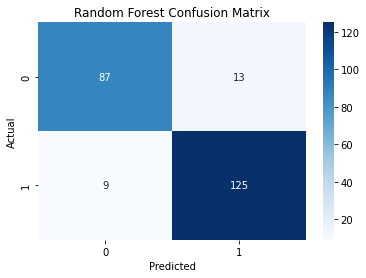

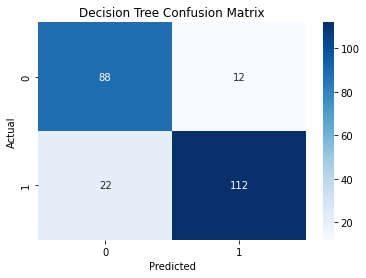

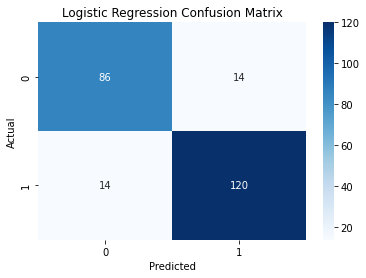

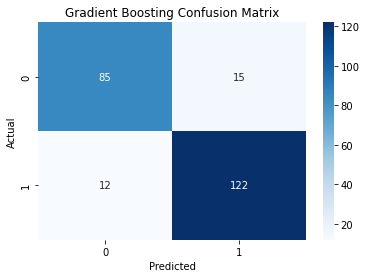

In [52]:
# Random Forest Classifier Confusion Matrix
cm_rf = confusion_matrix(y_test_class, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Classifier Confusion Matrix
cm_dtree = confusion_matrix(y_test_class, y_pred_dtree)
plt.figure(figsize=(6,4))
sns.heatmap(cm_dtree, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test_class, y_pred_logreg)
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Gradient Boosting Classifier Confusion Matrix
cm_gb = confusion_matrix(y_test_class, y_pred_gb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Cross Validation

In [53]:
# Cross-Validation for Random Forest Classification
cv_scores_rf = cross_val_score(rf, X_classification_top, y_classification, cv=5, scoring='accuracy')
average_cv_score_rf = cv_scores_rf.mean()

# Cross-Validation for Decision Tree Classification
cv_scores_dtree = cross_val_score(dtree, X_classification_top, y_classification, cv=5, scoring='accuracy')
average_cv_score_dtree = cv_scores_dtree.mean()

# Cross-Validation for Logistic Regression Classification
cv_scores_logreg = cross_val_score(logreg, X_classification_top, y_classification, cv=5, scoring='accuracy')
average_cv_score_logreg = cv_scores_logreg.mean()

# Cross-Validation for Gradient Boosting Classification
cv_scores_gb = cross_val_score(gb, X_classification_top, y_classification, cv=5, scoring='accuracy')
average_cv_score_gb = cv_scores_gb.mean()

# Create a DataFrame to show the cross-validation results
cv_clf_results_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Gradient Boosting'],
    'Fold 1 Accuracy': [cv_scores_rf[0], cv_scores_dtree[0], cv_scores_logreg[0], cv_scores_gb[0]],
    'Fold 2 Accuracy': [cv_scores_rf[1], cv_scores_dtree[1], cv_scores_logreg[1], cv_scores_gb[1]],
    'Fold 3 Accuracy': [cv_scores_rf[2], cv_scores_dtree[2], cv_scores_logreg[2], cv_scores_gb[2]],
    'Fold 4 Accuracy': [cv_scores_rf[3], cv_scores_dtree[3], cv_scores_logreg[3], cv_scores_gb[3]],
    'Fold 5 Accuracy': [cv_scores_rf[4], cv_scores_dtree[4], cv_scores_logreg[4], cv_scores_gb[4]],
    'Average Accuracy': [average_cv_score_rf, average_cv_score_dtree, average_cv_score_logreg, average_cv_score_gb]
})

# Display the updated results table
cv_clf_results_df



,Model,Fold 1 Accuracy,Fold 2 Accuracy,Fold 3 Accuracy,Fold 4 Accuracy,Fold 5 Accuracy,Average Accuracy
0,Random Forest,0.623932,0.914530,0.978541,1.000000,1.000000,0.903400
1,Decision Tree,0.628205,0.863248,0.969957,1.000000,1.000000,0.892282
2,Logistic Regression,0.649573,0.893162,0.824034,0.866953,0.836910,0.814126
3,Gradient Boosting,0.623932,0.867521,0.927039,0.961373,0.987124,0.873398


### Receiver Operating Characteristic (ROC) Curve. 

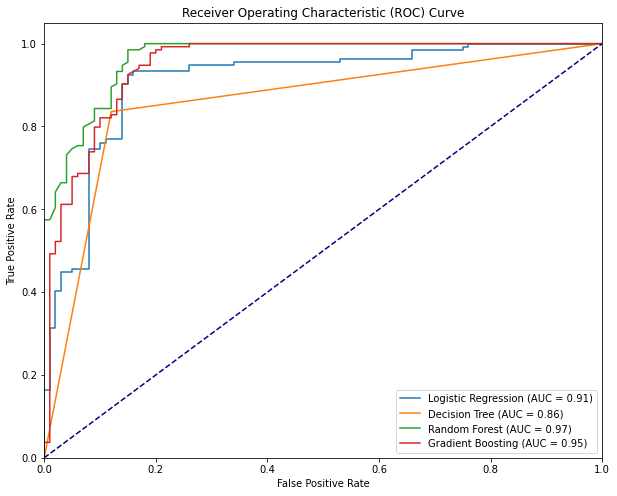

In [54]:
# Initialize the plot
plt.figure(figsize=(10, 8))

# Logistic Regression ROC Curve
fpr_logreg, tpr_logreg, _ = roc_curve(y_test_class, y_pred_logreg_proba)
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')

# Decision Tree ROC Curve
fpr_dtree, tpr_dtree, _ = roc_curve(y_test_class, y_pred_dtree_proba)
plt.plot(fpr_dtree, tpr_dtree, label=f'Decision Tree (AUC = {roc_auc_dtree:.2f})')

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test_class, y_pred_rf_proba)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')

# Gradient Boosting ROC Curve
fpr_gb, tpr_gb, _ = roc_curve(y_test_class, y_pred_gb_proba)
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Dashed diagonal line (no discrimination)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Regression

In [55]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_reg, y_train_reg)

LinearRegression()

In [56]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_reg, y_train_reg)

Ridge()

In [57]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_reg, y_train_reg)

Lasso(alpha=0.1)

In [58]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_reg, y_train_reg)

GradientBoostingRegressor(random_state=42)

In [59]:
# Linear Regression
y_pred_lr = lr.predict(X_test_reg)
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}')

# Ridge Regression
y_pred_ridge = ridge.predict(X_test_reg)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
r2_ridge = r2_score(y_test_reg, y_pred_ridge)
print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}')

# Lasso Regression
y_pred_lasso = lasso.predict(X_test_reg)
mse_lasso = mean_squared_error(y_test_reg, y_pred_lasso)
r2_lasso = r2_score(y_test_reg, y_pred_lasso)
print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}')

# Gradient Boosting Regressor
y_pred_gbr = gbr.predict(X_test_reg)
mse_gbr = mean_squared_error(y_test_reg, y_pred_gbr)
r2_gbr = r2_score(y_test_reg, y_pred_gbr)
print(f'Gradient Boosting Regressor - MSE: {mse_gbr}, R2: {r2_gbr}')

Linear Regression - MSE: 0.09684189834930537, R2: 0.6821319394548278
Ridge Regression - MSE: 0.09686183407675036, R2: 0.6820665036142823
Lasso Regression - MSE: 0.12595747011701042, R2: 0.5865647264280649
Gradient Boosting Regressor - MSE: 0.05393052687279433, R2: 0.8229816611049798


In [60]:
# Linear Regression
y_pred_lr = lr.predict(X_test_reg)
mse_lr = mean_squared_error(y_test_reg, y_pred_lr)
r2_lr = r2_score(y_test_reg, y_pred_lr)
mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
print(f'Linear Regression - MSE: {mse_lr}, R2: {r2_lr}, MAE: {mae_lr}, RMSE: {rmse_lr}')

# Ridge Regression
y_pred_ridge = ridge.predict(X_test_reg)
mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
r2_ridge = r2_score(y_test_reg, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test_reg, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
print(f'Ridge Regression - MSE: {mse_ridge}, R2: {r2_ridge}, MAE: {mae_ridge}, RMSE: {rmse_ridge}')

# Lasso Regression
y_pred_lasso = lasso.predict(X_test_reg)
mse_lasso = mean_squared_error(y_test_reg, y_pred_lasso)
r2_lasso = r2_score(y_test_reg, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test_reg, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
print(f'Lasso Regression - MSE: {mse_lasso}, R2: {r2_lasso}, MAE: {mae_lasso}, RMSE: {rmse_lasso}')

# Gradient Boosting Regressor
y_pred_gbr = gbr.predict(X_test_reg)
mse_gbr = mean_squared_error(y_test_reg, y_pred_gbr)
r2_gbr = r2_score(y_test_reg, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test_reg, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)
print(f'Gradient Boosting Regressor - MSE: {mse_gbr}, R2: {r2_gbr}, MAE: {mae_gbr}, RMSE: {rmse_gbr}')

Linear Regression - MSE: 0.09684189834930537, R2: 0.6821319394548278, MAE: 0.23648097961334003, RMSE: 0.3111943096351625
Ridge Regression - MSE: 0.09686183407675036, R2: 0.6820665036142823, MAE: 0.23649904155582607, RMSE: 0.3112263389829826
Lasso Regression - MSE: 0.12595747011701042, R2: 0.5865647264280649, MAE: 0.29194525348563727, RMSE: 0.3549048747439381
Gradient Boosting Regressor - MSE: 0.05393052687279433, R2: 0.8229816611049798, MAE: 0.134591390909488, RMSE: 0.23222947029348864


In [61]:
# Define a scoring dictionary to capture both MSE and R²
scoring = {'mse': 'neg_mean_squared_error', 'r2': 'r2'}

# Cross-Validation for Linear Regression
cv_results_lr = cross_validate(lr, X_classification_top, y_classification, cv=5, scoring=scoring)
cv_scores_lr_mse = -cv_results_lr['test_mse']
cv_scores_lr_r2 = cv_results_lr['test_r2']
average_cv_score_lr_mse = cv_scores_lr_mse.mean()
average_cv_score_lr_r2 = cv_scores_lr_r2.mean()

# Cross-Validation for Ridge Regression
cv_results_ridge = cross_validate(ridge, X_classification_top, y_classification, cv=5, scoring=scoring)
cv_scores_ridge_mse = -cv_results_ridge['test_mse']
cv_scores_ridge_r2 = cv_results_ridge['test_r2']
average_cv_score_ridge_mse = cv_scores_ridge_mse.mean()
average_cv_score_ridge_r2 = cv_scores_ridge_r2.mean()

# Cross-Validation for Lasso Regression
cv_results_lasso = cross_validate(lasso, X_classification_top, y_classification, cv=5, scoring=scoring)
cv_scores_lasso_mse = -cv_results_lasso['test_mse']
cv_scores_lasso_r2 = cv_results_lasso['test_r2']
average_cv_score_lasso_mse = cv_scores_lasso_mse.mean()
average_cv_score_lasso_r2 = cv_scores_lasso_r2.mean()

# Cross-Validation for Gradient Boosting Regressor
cv_results_gbr = cross_validate(gbr, X_classification_top, y_classification, cv=5, scoring=scoring)
cv_scores_gbr_mse = -cv_results_gbr['test_mse']
cv_scores_gbr_r2 = cv_results_gbr['test_r2']
average_cv_score_gbr_mse = cv_scores_gbr_mse.mean()
average_cv_score_gbr_r2 = cv_scores_gbr_r2.mean()


# Create a DataFrame to show the results
cv_reg_results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Gradient Boosting Regressor'],
    'Fold 1 MSE': [cv_scores_lr_mse[0], cv_scores_ridge_mse[0], cv_scores_lasso_mse[0], cv_scores_gbr_mse[0]],
    'Fold 2 MSE': [cv_scores_lr_mse[1], cv_scores_ridge_mse[1], cv_scores_lasso_mse[1], cv_scores_gbr_mse[1]],
    'Fold 3 MSE': [cv_scores_lr_mse[2], cv_scores_ridge_mse[2], cv_scores_lasso_mse[2], cv_scores_gbr_mse[2]],
    'Fold 4 MSE': [cv_scores_lr_mse[3], cv_scores_ridge_mse[3], cv_scores_lasso_mse[3], cv_scores_gbr_mse[3]],
    'Fold 5 MSE': [cv_scores_lr_mse[4], cv_scores_ridge_mse[4], cv_scores_lasso_mse[4], cv_scores_gbr_mse[4]],
    'Average MSE': [average_cv_score_lr_mse, average_cv_score_ridge_mse, average_cv_score_lasso_mse, average_cv_score_gbr_mse],
    'Fold 1 R²': [cv_scores_lr_r2[0], cv_scores_ridge_r2[0], cv_scores_lasso_r2[0], cv_scores_gbr_r2[0]],
    'Fold 2 R²': [cv_scores_lr_r2[1], cv_scores_ridge_r2[1], cv_scores_lasso_r2[1], cv_scores_gbr_r2[1]],
    'Fold 3 R²': [cv_scores_lr_r2[2], cv_scores_ridge_r2[2], cv_scores_lasso_r2[2], cv_scores_gbr_r2[2]],
    'Fold 4 R²': [cv_scores_lr_r2[3], cv_scores_ridge_r2[3], cv_scores_lasso_r2[3], cv_scores_gbr_r2[3]],
    'Fold 5 R²': [cv_scores_lr_r2[4], cv_scores_ridge_r2[4], cv_scores_lasso_r2[4], cv_scores_gbr_r2[4]],
    'Average R²': [average_cv_score_lr_r2, average_cv_score_ridge_r2, average_cv_score_lasso_r2, average_cv_score_gbr_r2]
})

# Display the table
cv_reg_results_df

,Model,Fold 1 MSE,Fold 2 MSE,Fold 3 MSE,Fold 4 MSE,Fold 5 MSE,Average MSE,Fold 1 R²,Fold 2 R²,Fold 3 R²,Fold 4 R²,Fold 5 R²,Average R²
0,Linear Regression,0.290151,0.148148,0.118821,0.132119,0.129084,0.163665,-0.460249,0.368619,0.507956,0.444929,0.467166,0.265684
1,Ridge Regression,0.288767,0.148410,0.119158,0.132014,0.128973,0.163464,-0.453285,0.367503,0.506561,0.445372,0.467624,0.266755
2,Lasso Regression,0.202113,0.220960,0.234828,0.192065,0.208709,0.211735,-0.017180,0.058305,0.027569,0.193080,0.138488,0.080052
3,Gradient Boosting Regressor,0.241506,0.157892,0.007895,0.033144,0.024144,0.092916,-0.215433,0.327092,0.967309,0.860754,0.900340,0.568012


## Bias-Variance Trade-off

In [62]:
# Predictions on the training data
y_train_pred_gbr = gbr.fit(X_train_reg, y_train_reg).predict(X_train_reg)
train_error_gbr = mean_squared_error(y_train_reg, y_train_pred_gbr)

# Predictions on the test data
y_pred_gbr = gbr.predict(X_test_reg)
test_error_gbr = mean_squared_error(y_test_reg, y_pred_gbr)

print(f'Gradient Boosting Regression - Train Error: {train_error_gbr}, Test Error: {test_error_gbr}')

Gradient Boosting Regression - Train Error: 0.02818217480682255, Test Error: 0.05393052687279433


## Hyperparameter Tuning

In [63]:
# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'subsample': [0.7, 0.8, 1.0]
}

# Perform Grid Search
grid_search_gbr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr.fit(X_train_reg, y_train_reg)

# Best hyperparameters found
best_gbr = grid_search_gbr.best_estimator_
print(f'Best Hyperparameters: {grid_search_gbr.best_params_}')


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}


In [64]:
# Final evaluation using the best Gradient Boosting model
y_pred_best_gbr = best_gbr.predict(X_test_reg)
mse_best_gbr = mean_squared_error(y_test_reg, y_pred_best_gbr)
r2_best_gbr = r2_score(y_test_reg, y_pred_best_gbr)

print(f'Best Gradient Boosting Regression - Final MSE: {mse_best_gbr}, R2: {r2_best_gbr}')

Best Gradient Boosting Regression - Final MSE: 0.03711902362826431, R2: 0.8781627348166143


In [65]:
# Predictions on the training data using the tuned model
y_train_pred_best_gbr = best_gbr.predict(X_train_reg)
train_error_best_gbr = mean_squared_error(y_train_reg, y_train_pred_best_gbr)

# Predictions on the test data using the tuned model
y_test_pred_best_gbr = best_gbr.predict(X_test_reg)
test_error_best_gbr = mean_squared_error(y_test_reg, y_test_pred_best_gbr)

# Compare the errors to assess bias and variance
print(f'Best Gradient Boosting Regressor - Train Error: {train_error_best_gbr}, Test Error: {test_error_best_gbr}')

Best Gradient Boosting Regressor - Train Error: 0.0018395981526284225, Test Error: 0.03711902362826431


## Clustering

In [66]:
# Select features for clustering
selected_columns = ['occupation', 'time_dp','easeof_online','relaxed']

df1 = data_copy [selected_columns]
data_encoded = pd.get_dummies(df1, drop_first=True)

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

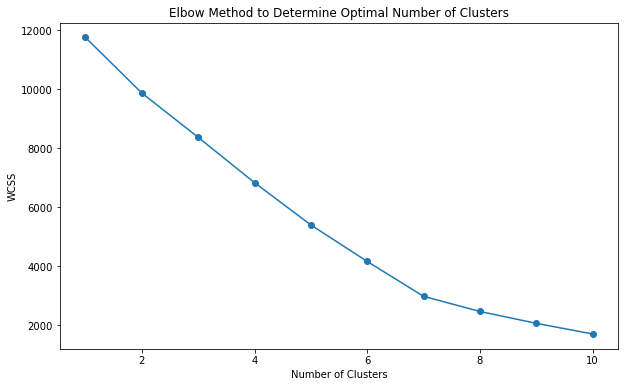

In [67]:
# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster Sum of Squares
plt.show()

In [68]:
# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# WCSS for K-Means (this is automatically calculated by the model)
wcss_kmeans = kmeans.inertia_

# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
agg_labels = agg_clustering.fit_predict(data_scaled)

# WCSS for Agglomerative Clustering (manual calculation)
wcss_agg = 0
for i in np.unique(agg_labels):
    cluster_points = data_scaled[agg_labels == i]
    centroid = np.mean(cluster_points, axis=0)
    wcss_agg += np.sum((cluster_points - centroid) ** 2)

# Calculate Silhouette Score for both methods
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)
agg_silhouette = silhouette_score(data_scaled, agg_labels)

# Output the results
print(f"K-Means Silhouette Score: {kmeans_silhouette}")
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette}")
print(f"K-Means WCSS: {wcss_kmeans}")
print(f"Agglomerative Clustering WCSS: {wcss_agg}")

K-Means Silhouette Score: 0.3858381537985409
Agglomerative Clustering Silhouette Score: 0.4085849298260953
K-Means WCSS: 6831.9711828922955
Agglomerative Clustering WCSS: 6756.914457815855


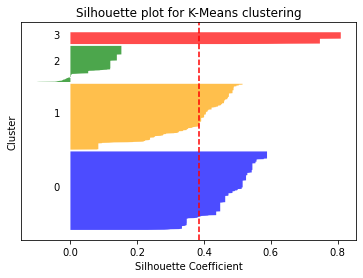

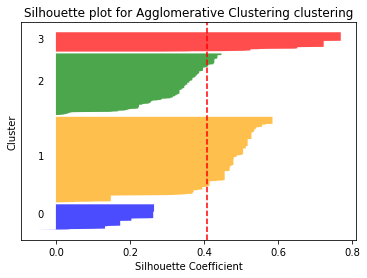

In [69]:
# Updated silhouette plotting function with dark colors
def plot_silhouette(X, labels, title):
    silhouette_avg = silhouette_score(X, labels)
    sample_values = silhouette_samples(X, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    # Darker shades of blue, orange, green, red
    colors = ['blue', 'orange', 'green', 'red']  

    for i, color in zip(np.unique(labels), colors):
        cluster_values = np.sort(sample_values[labels == i])
        size_cluster = len(cluster_values)
        y_upper = y_lower + size_cluster

        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_values, facecolor=color, alpha=0.7)
        ax.text(-0.05, y_lower + 0.5 * size_cluster, str(i))
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_title(f"Silhouette plot for {title} clustering")
    ax.set_xlabel("Silhouette Coefficient")
    ax.set_ylabel("Cluster")
    ax.set_yticks([])
    plt.show()

# Apply clustering and plot silhouette for both K-Means and Agglomerative Clustering
def apply_clustering_and_plot(X, n_clusters=4):
    clusters = {
        'K-Means': KMeans(n_clusters=n_clusters, random_state=42).fit_predict(X),
        'Agglomerative Clustering': AgglomerativeClustering(n_clusters=n_clusters).fit_predict(X)
    }
    for name, labels in clusters.items():
        plot_silhouette(X, labels, name)

# Call the function to cluster and plot
apply_clustering_and_plot(data_scaled)


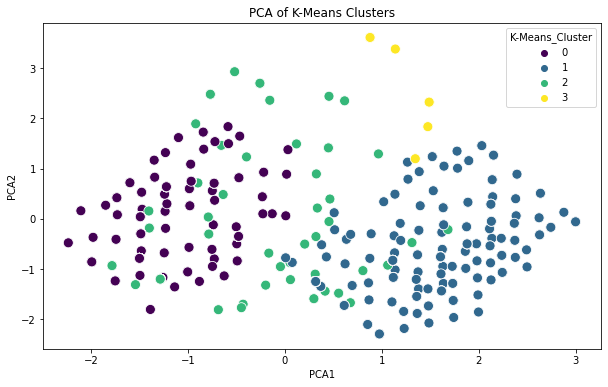

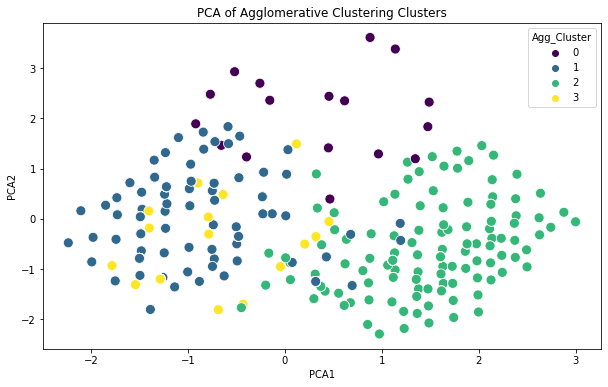

In [70]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
# pca_df['K-Means_Cluster'] = data_encoded['K-Means_Cluster']
# pca_df['Agg_Cluster'] = data_encoded['Agg_Cluster']
# Add the cluster labels from K-Means and Agglomerative Clustering
pca_df['K-Means_Cluster'] = kmeans_labels
pca_df['Agg_Cluster'] = agg_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='K-Means_Cluster', data=pca_df, palette='viridis', s=100)
plt.title('PCA of K-Means Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Agg_Cluster', data=pca_df, palette='viridis', s=100)
plt.title('PCA of Agglomerative Clustering Clusters')
plt.show()

In [71]:
# First, add the cluster labels to the encoded data for analysis
data_encoded['K-Means_Cluster'] = kmeans_labels
data_encoded['Agg_Cluster'] = agg_labels

# Analyze the clusters by calculating the mean of each feature in each cluster
kmeans_cluster_means = data_encoded.groupby('K-Means_Cluster').mean()
agg_cluster_means = data_encoded.groupby('Agg_Cluster').mean()

In [72]:
# Compare cluster characteristics
kmeans_cluster_means

,time_dp,easeof_online,relaxed,occupation_Entrepreneur,occupation_Homemaker,occupation_Medical Professional aiding efforts against COVID-19,occupation_Retired/Senior Citizen,occupation_Student in College,occupation_Student in School,occupation_Working Professional,Agg_Cluster
K-Means_Cluster,,,,,,,,,,,
0,8.572025,2.425887,0.175365,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,1.0,1.000000
1,6.286070,2.865672,-0.002488,0.000000,0.000000,0.0,0.00000,0.890547,0.000000,0.0,1.890547
2,9.153846,1.864253,0.067873,0.538462,0.371041,0.0,0.00905,0.000000,0.081448,0.0,1.778281
3,9.739726,3.438356,-0.767123,0.000000,0.000000,1.0,0.00000,0.000000,0.000000,0.0,0.000000


In [73]:
agg_cluster_means

,time_dp,easeof_online,relaxed,occupation_Entrepreneur,occupation_Homemaker,occupation_Medical Professional aiding efforts against COVID-19,occupation_Retired/Senior Citizen,occupation_Student in College,occupation_Student in School,occupation_Working Professional,K-Means_Cluster
Agg_Cluster,,,,,,,,,,,
0,9.968153,2.401274,-0.659236,0.0,0.522293,0.464968,0.012739,0.000000,0.000000,0.00000,2.464968
1,8.261950,2.552581,0.233270,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.91587,0.084130
2,6.454787,2.728723,-0.094415,0.0,0.000000,0.000000,0.000000,0.952128,0.047872,0.00000,1.047872
3,8.857143,2.008403,0.495798,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,2.000000
